In [1]:
import os
import urllib
import cv2
import numpy as np
from importlib.metadata import version
from pixellib.semantic import semantic_segmentation
from matplotlib import pyplot as plt

print(cv2.__version__)
print(version('pixellib'))

4.5.3
0.7.1


PixelLib에서 제공해 주는 모델을 다운로드

In [2]:
model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models'
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5') 
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5'
urllib.request.urlretrieve(model_url, model_file)

('/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5',
 <http.client.HTTPMessage at 0x7f212838f700>)

### 1. 인물 사진

(701, 1080, 3)


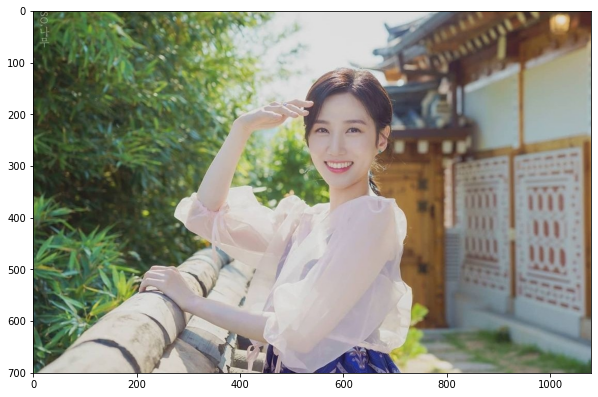

In [3]:
img_path = '/aiffel/aiffel/human_segmentation/images/eunbin.jpg'
person = cv2.imread(img_path)
print(person.shape)

plt.figure(figsize = (10, 20))
plt.imshow(cv2.cvtColor(person, cv2.COLOR_BGR2RGB))
plt.show()

In [4]:
model = semantic_segmentation()
model.load_pascalvoc_model(model_file)

In [5]:
segvalues, output = model.segmentAsPascalvoc(img_path)

In [6]:
#pascalvoc 데이터의 라벨종류
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

21

In [7]:
plt.figure(figsize = (10, 20))
plt.imshow(output)
plt.show()

In [8]:
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
person


In [9]:
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20]

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [10]:
colormap[15]

array([192, 128, 128])

In [11]:
seg_color = (128,128,192)

(701, 1080)


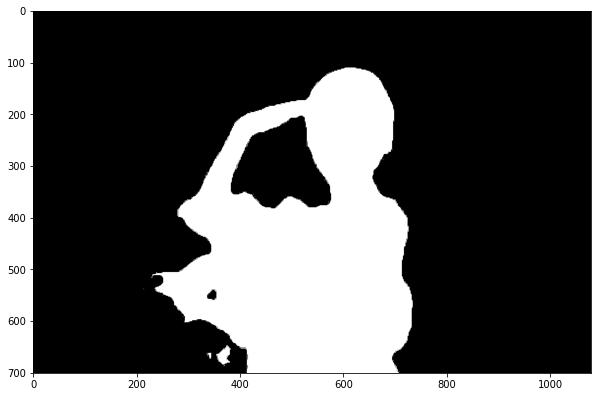

In [12]:
seg_map = np.all(output==seg_color, axis=-1) 
print(seg_map.shape) 
plt.figure(figsize = (10, 20))
plt.imshow(seg_map, cmap='gray')
plt.show()

In [13]:
img_show = person.copy()

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
img_mask = seg_map.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.figure(figsize = (10, 20))
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

In [14]:
img_orig_blur = cv2.blur(person, (10,10))
plt.figure(figsize = (10, 20))
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

In [15]:
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
img_bg_mask = cv2.bitwise_not(img_mask_color)
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.figure(figsize = (10, 20))
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

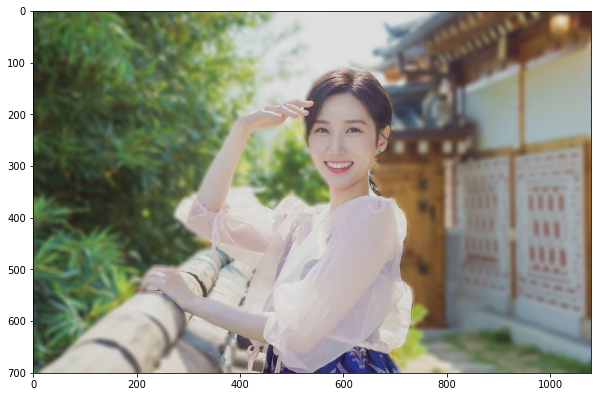

In [16]:
img_concat = np.where(img_mask_color==255, person, img_bg_blur)
plt.figure(figsize = (10, 20))
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

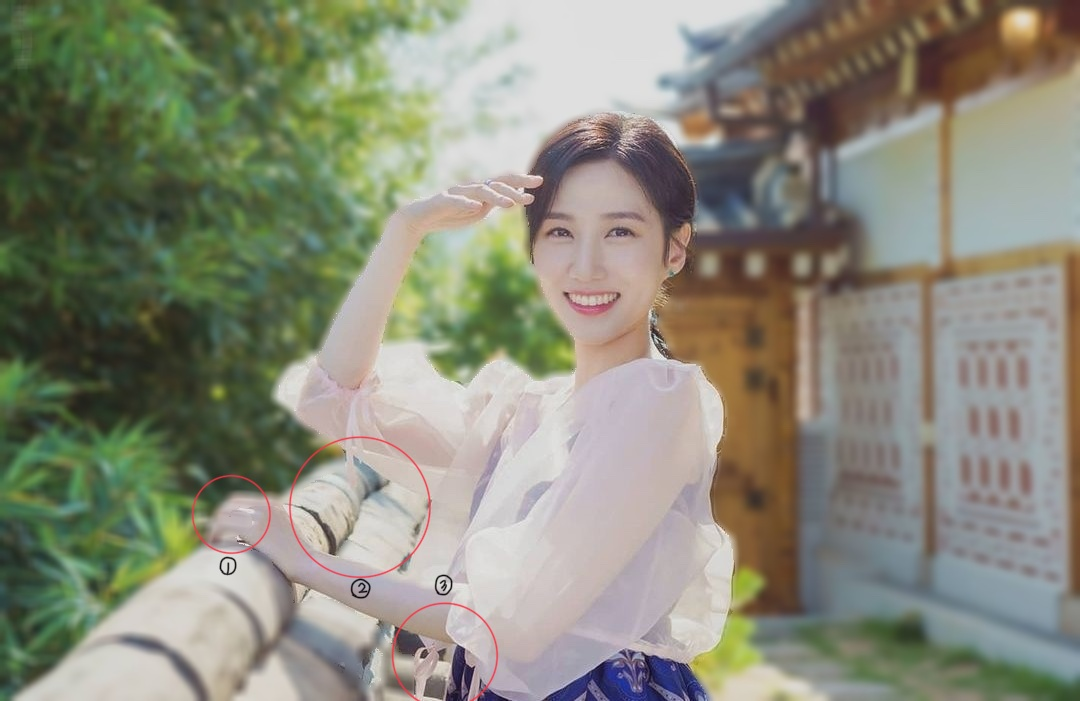

1. 손가락이 배경으로 인식되어 흐릿하게 나왔다.
2. 손과 팔 사이의 공간이 배경으로 분리되지 않고, 사람으로 인식되어 선명해졌다.
3. 옷의 끈 장식이 사람으로 인식되어 그 주변부까지 배경이 되었다.

In [17]:
cv2.imwrite('/aiffel/aiffel/human_segmentation/images/eunbin_shallow.jpg', img_concat)

True

### 2. 동물 사진

(1277, 1920, 3)


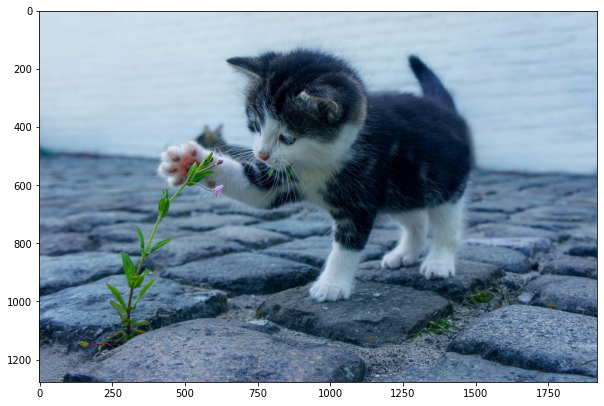

In [18]:
img2_path = '/aiffel/aiffel/human_segmentation/images/cat.jpg'
cat = cv2.imread(img2_path)
print(cat.shape)

plt.figure(figsize=(10,20))
plt.imshow(cv2.cvtColor(cat, cv2.COLOR_BGR2RGB))
plt.show()

In [19]:
segvalues, output = model.segmentAsPascalvoc(img2_path)

In [20]:
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

21

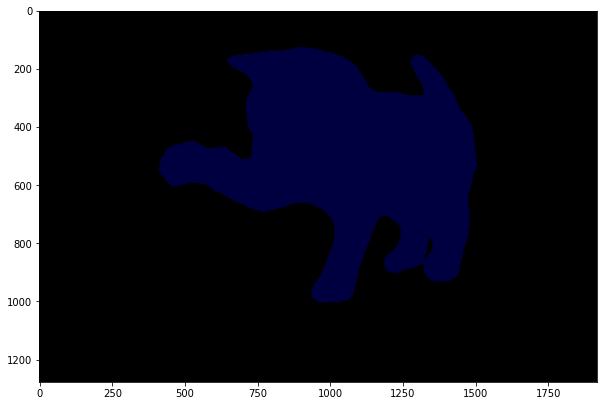

In [21]:
plt.figure(figsize=(10, 20))
plt.imshow(output)
plt.show()

In [22]:
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
cat


In [23]:
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20]

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [24]:
LABEL_NAMES.index('cat')

8

In [25]:
colormap[8]

array([64,  0,  0])

In [26]:
seg_color = (0, 0, 64)

(1277, 1920)


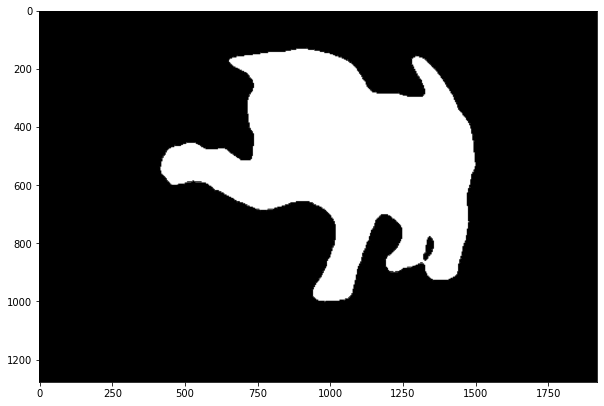

In [27]:
seg_map = np.all(output==seg_color, axis=-1) 
print(seg_map.shape) 
plt.figure(figsize=(10, 20))
plt.imshow(seg_map, cmap='gray')
plt.show()

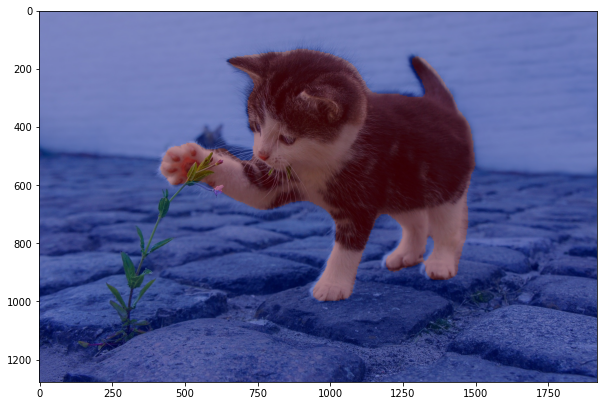

In [28]:
img_show = cat.copy()
img_mask = seg_map.astype(np.uint8) * 255
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)
plt.figure(figsize=(10, 20))
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

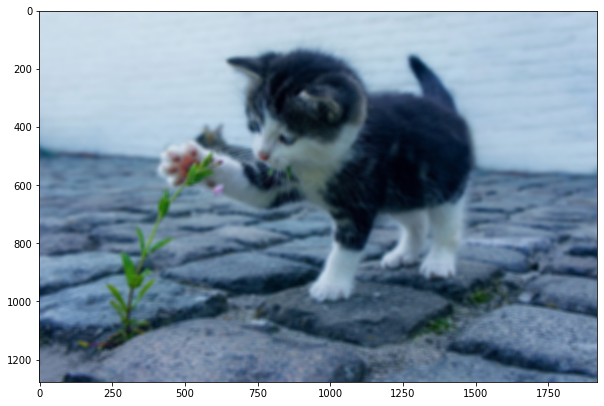

In [29]:
img_orig_blur = cv2.blur(cat, (15,15))
plt.figure(figsize=(10, 20))
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

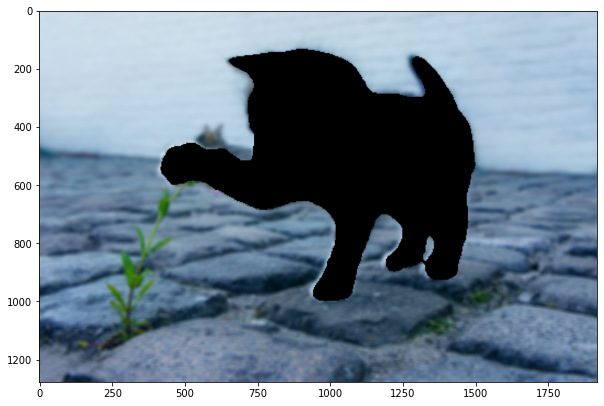

In [30]:
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
img_bg_mask = cv2.bitwise_not(img_mask_color)
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.figure(figsize=(10, 20))
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

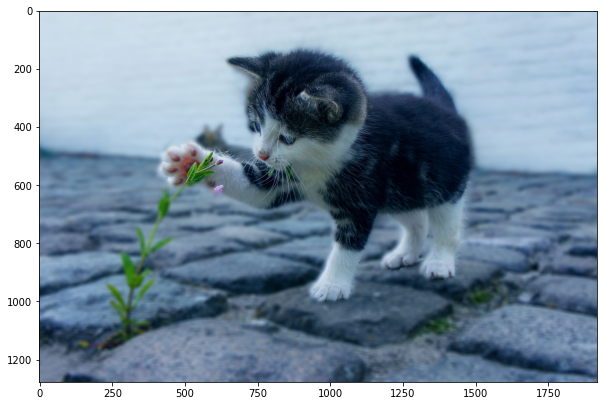

In [31]:
img_concat = np.where(img_mask_color==255, cat, img_bg_blur)
plt.figure(figsize=(10, 20))
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

In [32]:
cv2.imwrite('/aiffel/aiffel/human_segmentation/images/cat_shallow.jpg', img_concat)

True

- 고양이 사진은 대체로 segmentation이 잘 이루어졌다. 다만 배경이 원래 조금 흐릿해서 고양이가 선명하게 나오진 않은 것 같다. 고양이 발 앞에 있는 식물이 고양이로 인식되면서 선명하게 나오는 문제가 있었다.

### 3. 배경전환 크로마키사진

(360, 640, 3)


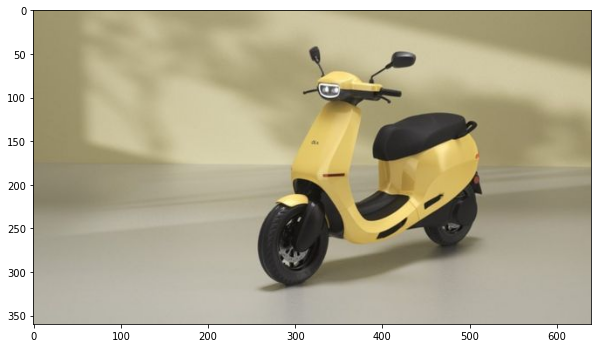

In [33]:
img3_path = '/aiffel/aiffel/human_segmentation/images/motorcycle.jpg'
motorcycle = cv2.imread(img3_path)
print(motorcycle.shape)

plt.figure(figsize=(10,20))
plt.imshow(cv2.cvtColor(motorcycle, cv2.COLOR_BGR2RGB))
plt.show()

In [34]:
segvalues, output = model.segmentAsPascalvoc(img3_path)
plt.figure(figsize=(10, 20))
plt.imshow(output)
plt.show()

In [35]:
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
motorbike


In [36]:
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20]

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [37]:
motorbike = LABEL_NAMES.index('motorbike')
print(motorbike)
colormap[motorbike]

14


array([ 64, 128, 128])

In [38]:
seg_color = (128, 128, 64)

(360, 640)


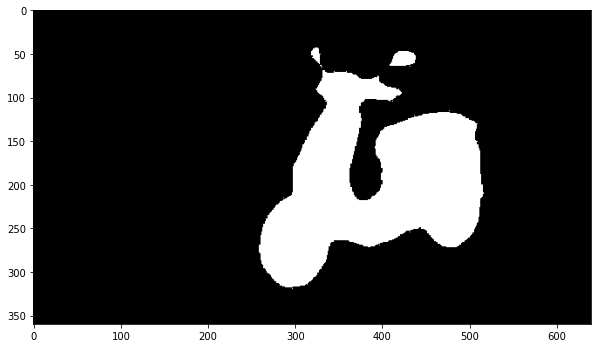

In [39]:
seg_map = np.all(output==seg_color, axis=-1) 
print(seg_map.shape) 
plt.figure(figsize=(10, 20))
plt.imshow(seg_map, cmap='gray')
plt.show()

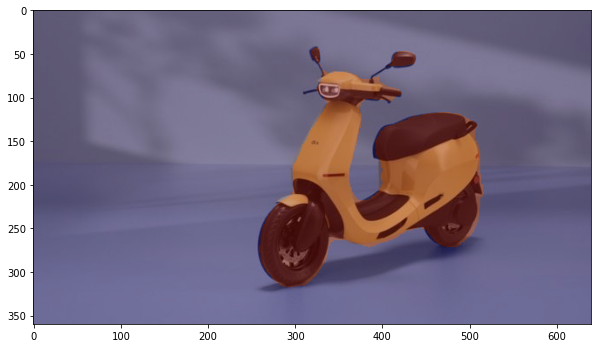

In [40]:
img_show = motorcycle.copy()
img_mask = seg_map.astype(np.uint8) * 255
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)
plt.figure(figsize=(10, 20))
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

In [41]:
img4_path = '/aiffel/aiffel/human_segmentation/images/window_background.jpg'
background = cv2.imread(img4_path)
background = cv2.resize(background, (640, 360))
print(background.shape)

plt.figure(figsize=(10,20))
plt.imshow(cv2.cvtColor(background, cv2.COLOR_BGR2RGB))
plt.show()

(360, 640, 3)


(1277, 1920, 3)


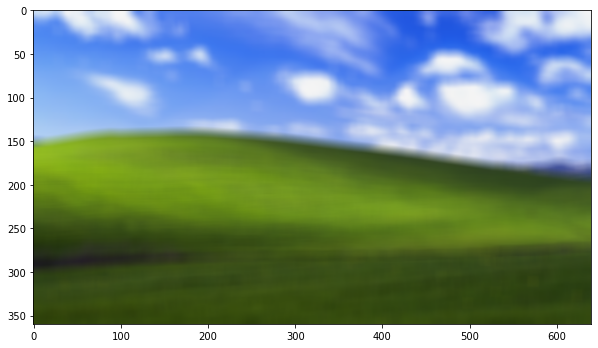

In [42]:
img_blur = cv2.blur(background, (13,13))
plt.figure(figsize=(10, 20))
print(img_mask_color.shape)
plt.imshow(cv2.cvtColor(img_blur, cv2.COLOR_BGR2RGB))
plt.show()

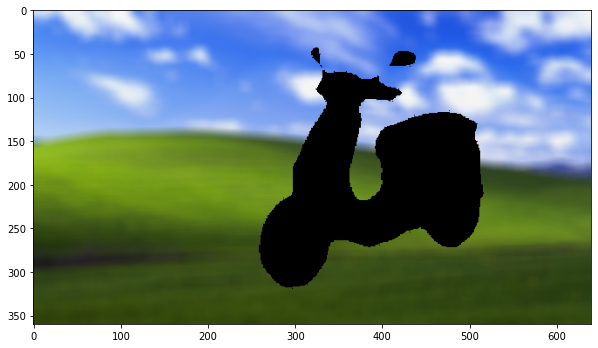

In [43]:
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
img_bg_mask = cv2.bitwise_not(img_mask_color)
img_bg_blur = cv2.bitwise_and(img_blur, img_bg_mask)
plt.figure(figsize=(10, 20))
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

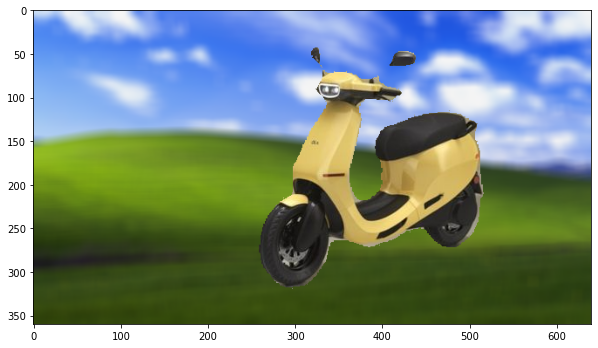

In [44]:
img_concat = np.where(img_mask_color==255, motorcycle, img_bg_blur)
plt.figure(figsize=(10, 20))
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

In [45]:
cv2.imwrite('/aiffel/aiffel/human_segmentation/images/img_concat.jpg', img_concat)

True

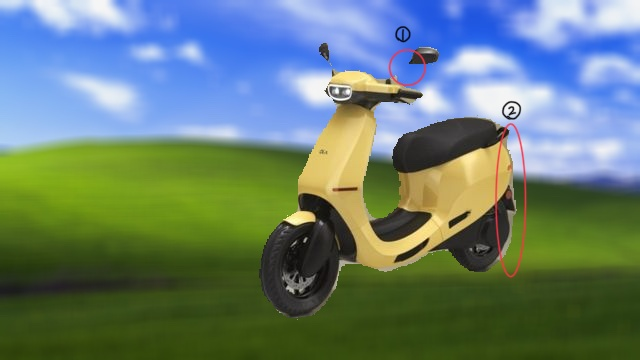

- 오토바이의 윤곽선을 제대로 인식하지 못하고 있다.
1. 오토바이 거울과 오토바이 본체가 연결되어 있어야 하는데 분리된 것을 확인할 수 있었다.
2. 윤곽이 선명하지 않아서 배경이 완전히 제거되지 않은 상태로 합성되었다.

#### 합성한 이미지에서도 물체를 잘 인식할까?

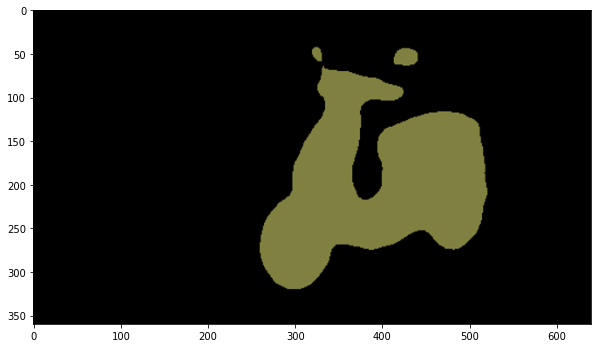

In [46]:
img_concat_path = '/aiffel/aiffel/human_segmentation/images/img_concat.jpg'
cv2.segvalues, output = model.segmentAsPascalvoc(img_concat_path)
plt.figure(figsize=(10, 20))
plt.imshow(output)
plt.show()

In [47]:
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
motorbike


- 합성한 이미지에서도 물체(오토바이)를 잘 인식하는 것을 확인할 수 있었다.

### 4. 문제 해결 방안

- 이미지의 윤곽을 제대로 인식하지 못해서 합성한 사진에서 어색한 부분들이 보였다. 제대로 인식하지 못한 부분들은 오토바이 거울과 본체를 이어주는 기둥 같은 작은 부분들이다. 작은 이미지를 확대하는 Image Pyramids를 주면 작은 부분도 더 인식을 잘 할 것이다.
- 배경전환 크로마키 사진에서 배경으로 사용할 이미지와의 크기 문제로 사진 크기를 조절하지 못했다. 포커스할 사진의 크기를 줄이고 여백은 padding을 주면 배경과의 크기를 맞추면서도 합성이 가능할 것 같다.

### 회고

<ol>
<ul> 1. <strong>프로젝트 설명</strong>
    <p> 이미지 segmentation을 이용하여 shallow focus를 구현하는 프로젝트를 진행했다. 시맨틱 세그멘테이션(semantic segmentation) 기법을 이용하여 인물과 배경을 분리하고, 배경을 블러처리하여 shallow focus 사진을 만들었다. 자연스럽게 합성된 사진을 만드는 것이 목표이다.</p>
</ul>
<ul> 2. <strong>시도한 것들</strong>
    <li> 인물, 동물 사진에서 shallow focus를 시도해 보았다.</li>
    <li> 기존 이미지에서 배경을 합성할 때 배열 크기 차이로 합성이 안 되는 문제를 발견했다. 사진을 불러올 때 사이즈를 조절하는 방식으로 문제를 해결했다.</li>
</ul>
<ul> 3. <strong>어려웠던 점</strong>
    <li> 윤곽선이 인식되지 않아서 shallow focus한 사진이 윤곽이 흐릿하게 나왔다.</li>
</ul>
<ul> 4. <strong>알게된 점</strong>
    <li> PASCAL VOC 데이터로 학습된 모델에서는 지정된 라벨에 있는 항목만 인식한다. 책과 고양이가 있는 사진에서는 라벨 안에 책이 없어 고양이를 제외하고는 모두 배경으로 인식하였다.</li>
</ul>
<ul> 5. <strong>아쉬운 점</strong>
    <li> 특히 다른 배경에 이미지를 합성하는 부분에서, 오토바이 이미지를 축소하고 위치를 조정하여 조금 더 자연스러운 이미지를 만들고 싶었는데 시도하지 못했다.</li>
</ul>
</ol>